<a href="https://colab.research.google.com/github/insomnia98/2021_AI_Python/blob/main/Cpsfestival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [38]:
df = pd.read_csv('/content/six.txt', delimiter = '\t')

In [39]:
df

,x,y
0,5,18
1,-15,-82
2,7,28
3,-7,-42
4,-11,-62
5,3,8
6,-9,-52
7,1,-2
8,-1,-12
9,11,48


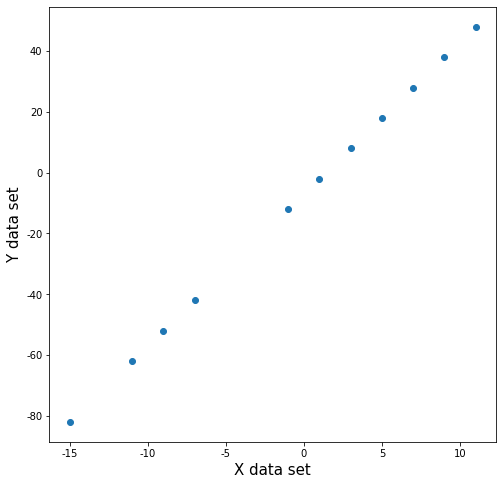

In [40]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['x'],df['y']) ## 원 데이터 산포도
 
plt.xlabel('X data set', fontsize=font_size)
plt.ylabel('Y data set',fontsize=font_size)
plt.show()

In [41]:
fit = ols('y ~ x',data=df).fit() ## 단순선형회귀모형 적합


In [42]:
fit.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.562e+31
Date:                Tue, 27 Jul 2021   Prob (F-statistic):          3.39e-140
Time:                        08:09:07   Log-Likelihood:                 334.26
No. Observations:                  11   AIC:                            -664.5
Df Residuals:                       9   BIC:                            -663.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0000   5.14e-15  -1.36e+15      0.000      -7.000      -7.000
x              5.0000   6.17e-16    8.1e+15      0.000       5.000       5.000
==============================================================================
Omnibus:                        0.905   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.666
Skew:                           0.211   Prob(JB):                        0.717
Kurtosis:                       1.871   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
## 회귀 계수
print(fit.params.Intercept) ## 절편
print(fit.params.x) ## 기울기

-7.000000000000001
5.000000000000002


In [44]:
## 추정값
fit.fittedvalues

0     18.0
1    -82.0
2     28.0
3    -42.0
4    -62.0
5      8.0
6    -52.0
7     -2.0
8    -12.0
9     48.0
10    38.0
dtype: float64

In [45]:
## 잔차
fit.resid

0    -7.105427e-15
1     2.842171e-14
2    -1.421085e-14
3     1.421085e-14
4     2.131628e-14
5    -3.552714e-15
6     1.421085e-14
7    -8.881784e-16
8     3.552714e-15
9    -2.131628e-14
10   -1.421085e-14
dtype: float64

In [46]:
## 예측값
fit.predict(exog=dict(x=[-11]))

0   -62.0
dtype: float64

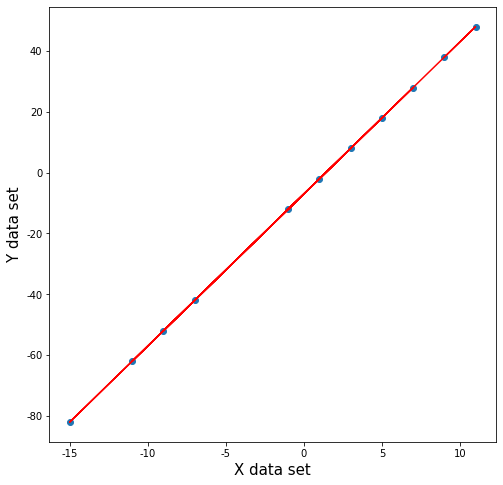

In [47]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['x'],df['y']) ## 원 데이터 산포도
plt.plot(df['x'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('X data set', fontsize=font_size)
plt.ylabel('Y data set',fontsize=font_size)
plt.show()

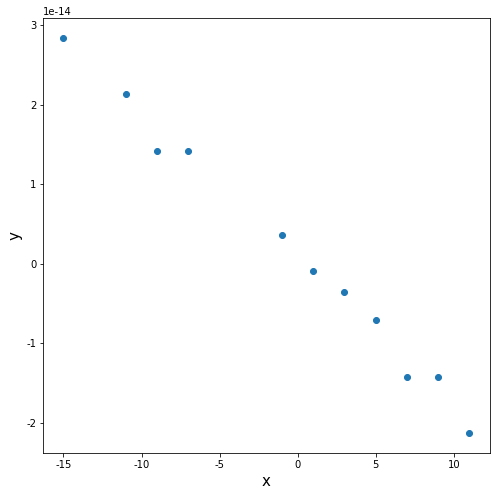

In [48]:
## 잔차도 Residual Plot
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
 
plt.scatter(df['x'],fit.resid) ## 잔차도 출력
 
plt.xlabel('x', fontsize=font_size)
plt.ylabel('y', fontsize=font_size)
plt.show()

# sklearn 이용

In [49]:
x = df['x'].values.reshape(-1,1) ## 차원 증가 시켜준다.
y = df['y']
 
fit = LinearRegression().fit(x,y) ## 단순선형회귀모형 적합


In [50]:
## 회귀 계수
print(fit.intercept_) ## 절편
print(fit.coef_) ## 기울기

-7.0
[5.]


In [51]:
fit.predict(x)

array([ 18., -82.,  28., -42., -62.,   8., -52.,  -2., -12.,  48.,  38.])

In [52]:
## 잔차
residual = y - fit.predict(x)
print(residual)

0     3.552714e-15
1    -1.421085e-14
2     7.105427e-15
3    -7.105427e-15
4    -7.105427e-15
5     3.552714e-15
6    -7.105427e-15
7     8.881784e-16
8     0.000000e+00
9     7.105427e-15
10    7.105427e-15
Name: y, dtype: float64


In [53]:
fit.predict([[-11],[-4],[-9],[-2],[-10],[-2],[0],[-3],[1],[-6],[-7]])


array([-62., -27., -52., -17., -57., -17.,  -7., -22.,  -2., -37., -42.])